Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('iris.csv') 
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# axis=1 means column, inplace=True means drop it from the dataframe
df.drop('Id', axis=1, inplace=True) 
df.rename(columns={
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width', 
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'   
}, inplace=True) 
df.info() # to check if the column names have been changed and the Id column has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#df.shape #checking the shape of the dataset  

In [5]:
df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df[df.duplicated()] # No duplicates 

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [7]:
df.drop_duplicates(inplace=True) # drops duplicate rows in the dataset 
df.duplicated().sum() # checks if there are any duplicate rows in the dataset 

0

In [8]:
df.describe () # Summary statistics for numerical columns 

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pie Chart 

<AxesSubplot:ylabel='count'>

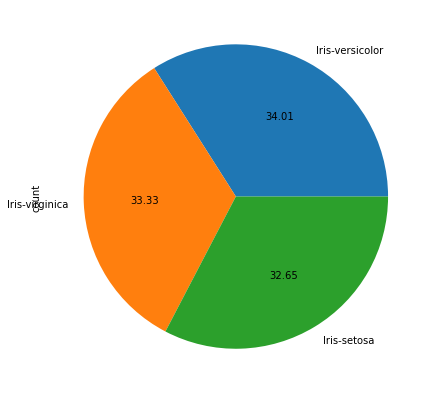

In [9]:
df['species'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(10, 7)) # autopct='%.2f' is used to show the percentage upto 2 decimal places

Distribution Plot 

In [10]:
# sns.displot(df["sepal_length"], hist=False) #hist=False, 
# sns.displot(df["petal_length"], hist=False) #hist=False, 
# sns.displot(df["petal_width"], hist=False) #hist=False, 
# sns.displot(df["sepal_width"], hist=False) #hist=False,  

In [11]:
# sns.jointplot(x=df['sepal_length'], y=df['petal_length'], data=df, kind='hex')  

In [12]:
# sns.jointplot(x='sepal_length',y='petal_width',data=df,kind='reg')

In [13]:
# plt.figure()
# sns.pairplot(df, hue='species', height=3, markers=['o', 's', 'D']) 

In [19]:
df1=df[['sepal_length','sepal_width','petal_length','petal_width']] 

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
import plotly.express as px

fig = px.scatter_3d(df, x="sepal_length", y="petal_length", z="petal_width", color="species", color_continuous_scale="Spectral")
fig.show()

 Feature Scaling 

In [25]:
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
X = df[feature].values # Features
y = df['species'].values # Target variable 

In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0) 

In [27]:
#Label Encoder  
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)

LabelEncoder()

In [28]:
y=le.transform(y) # Transforming the target variable to numerical values 

In [29]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train) # fit only on training data

StandardScaler()

In [30]:
X_train_scaled = scaler.transform(X_train) # fit_transform on training data
X_test_scaled = scaler.transform(X_test)  # transform on test data 

In [31]:
# Model Training and Evaluation 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

Logistic Regression 

In [32]:
model = LogisticRegression() 
model.fit(X_train_scaled, y_train) # fit the model on training data  


LogisticRegression()

In [33]:
model_pred = model.predict(X_test_scaled) 
accuracy_score(model_pred, y_test) 

0.9666666666666667

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm that can be used to solve both classification and regression problems. However, it is mainly used for classification problems in the industry.

In [34]:
clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train_scaled, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [35]:
clf_pred = clf.predict(X_test_scaled) 
accuracy_score(y_test, clf_pred)

0.9666666666666667

Support Vector Classfier 

In [36]:
from sklearn.svm import SVC 
svc=SVC() 
svc.fit(X_train_scaled,y_train) 

SVC()

In [37]:
svc_pred = svc.predict(X_test_scaled) 
accuracy_score(y_test, svc_pred) 

0.9666666666666667

In [38]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb.fit(X_train_scaled, y_train) 


GaussianNB()

In [39]:
nb_pred = nb.predict(X_test_scaled) 
accuracy_score(y_test, nb_pred) 

0.9666666666666667

In [40]:
# Model Evaluation 
confusion_matrix(y_test, model_pred) # Confusion Matrix 

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [41]:
confusion_matrix(y_test, clf_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [42]:
confusion_matrix(y_test, svc_pred)


array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [43]:
confusion_matrix(y_test, nb_pred)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  8]])

In [44]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','SVM', 'KNN','Naive Bayes'],
    'Score': [0.96,0.96,0.96,0.96]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.96,Logistic Regression
0.96,SVM
0.96,KNN
0.96,Naive Bayes
